# Summarizing metrics from disturbed XS

Leanne Friedrich 11/15/22

## initialization

In [3]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import sys
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import matplotlib.pyplot as plt
import py.metric_plots as mp
import py.metrics_disturb as me
import regression as rg
import matplotlib.cm as cm
import py.file_handling as fh
import pandas as pd
LOGGERDEFINED = logs.openLog('summary_xs.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [5]:
me.xsDisturbSummaries(os.path.join(cfg.path.server, 'singleDisturb'), os.path.join(cfg.path.fig, 'singleDisturb'), overwrite=False)

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\singleDisturb\xsDisturbSummaries.csv


In [14]:
msy = me.metricDisturbSummary(os.path.join(cfg.path.fig, 'singleDisturb', 'xs+yDisturbSummaries.csv'), diag=True)
print('\n\n')
msz = me.metricDisturbSummary(os.path.join(cfg.path.fig, 'singleDisturb', 'xs+zDisturbSummaries.csv'), diag=True)

Independents: ['printFolder', 'bn', 'date', 'sigma', 'fluFile', 'calibFile', 'spacing', 'vRatio', 'dEst', 'viscRatio', 'rGrav', 'int_Re', 'ReRatio', 'hDragP', 'vDragP', 'int_CaInv', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm']

Dependents: ['delta_aspect', 'delta_yshift', 'delta_xshift', 'delta_h_n', 'delta_w_n', 'delta_xc_n']



Independents: ['printFolder', 'bn', 'date', 'sigma', 'fluFile', 'calibFile', 'spacing', 'vRatio', 'dEst', 'viscRatio', 'rGrav', 'int_R

In [23]:
def waterOilPlots(ms:pd.DataFrame, yvar:str, yideal:float, mode:str='ppt', export:bool=False):
    if mode=='ppt':
        figsize = (9,6)
        fs = 18
        markersize=100
    elif mode=='paper':
        figsize=(6,4)
        fs = 10
        markersize=20
    fig,axs = plt.subplots(1,2,figsize=figsize, sharey=True, sharex=True)
    ms.ss.sort_values(by=['sigma', 'sup_val'], inplace=True)
    for i,sigma in enumerate(ms.ss.sigma.unique()):
        mp.scatterSS(ms, ms.ss[ms.ss.sigma==sigma], 'spacing', yvar, 'sup_val'
                 ,fig=fig, ax=axs[i], logx=False, yideal=yideal, xideal=0.875, fontsize=fs, markersize=markersize, legend=False)
    for ax in axs:
        mp.setSquare(ax)
        if ms.ss[yvar].min()<0:
            yy = ms.ss[yvar].min()*0.9
        else:
            yy = ms.ss[yvar].max()*0.9
        ax.text(0.88, yy, 'space filling', color='#555555', fontsize=fs)
        ax.text(1.08, 0.01, 'ideal', color='#555555', fontsize=fs)
    axs[0].set_title('Water/water', fontsize=fs)
    axs[1].set_title('Oil/water', fontsize=fs)
    fig.tight_layout()
    if '+y' in ms.ss.loc[0].printFolder:
        fig.supylabel('In plane')
    else:
        fig.supylabel('Out of plane')
    if export:
        fig.savefig(os.path.join(cfg.path.fig, 'singleDisturb', 'figures', f'horiz_{yvar}.svg'), bbox_inches='tight', dpi=300)

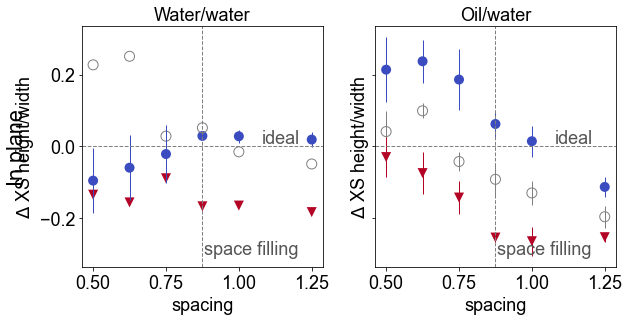

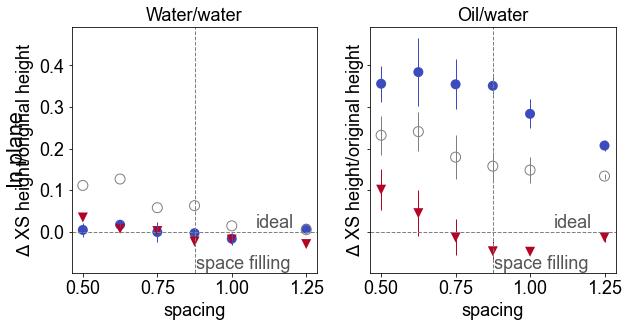

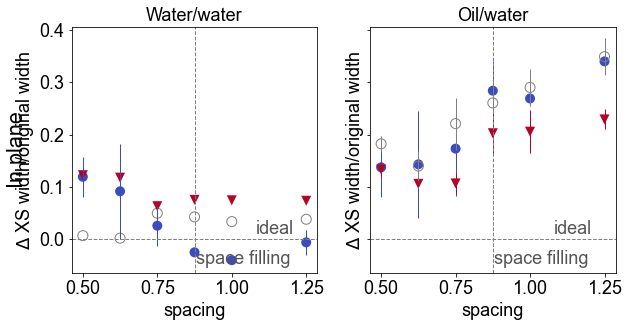

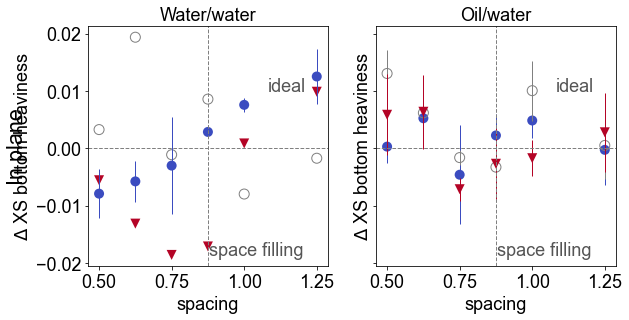

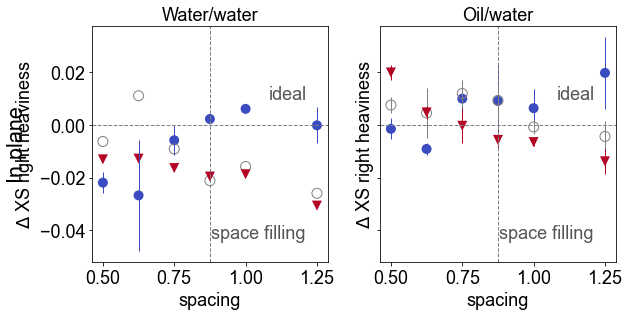

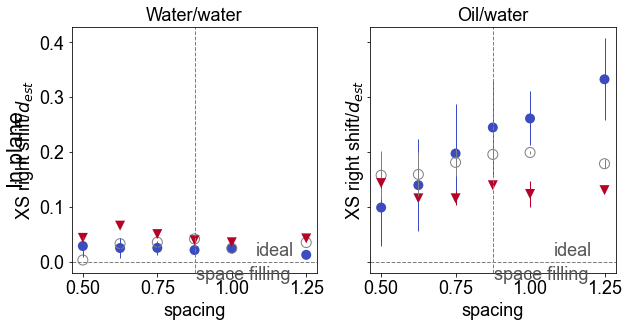

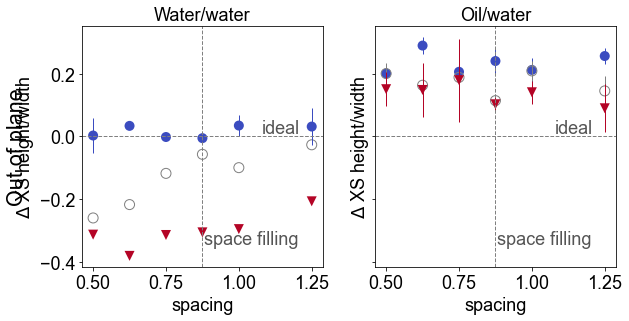

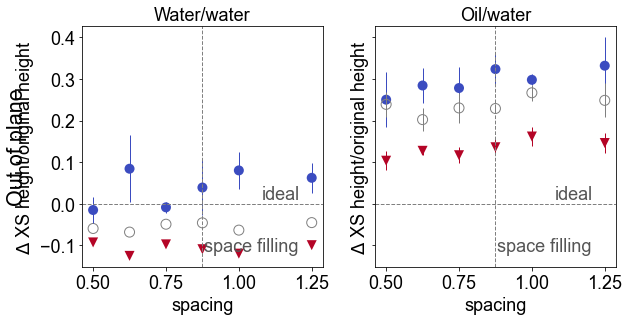

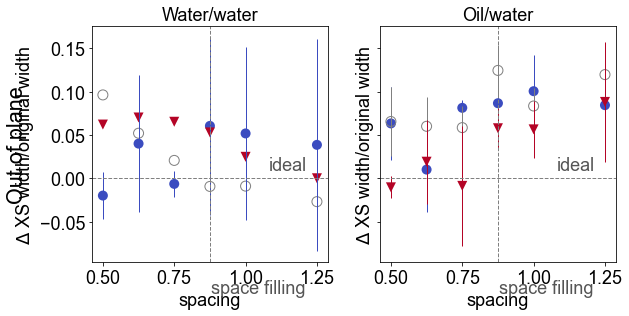

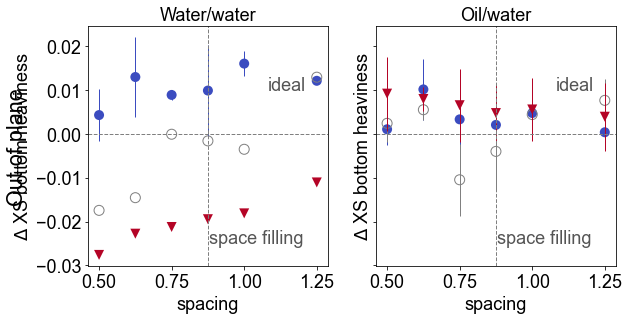

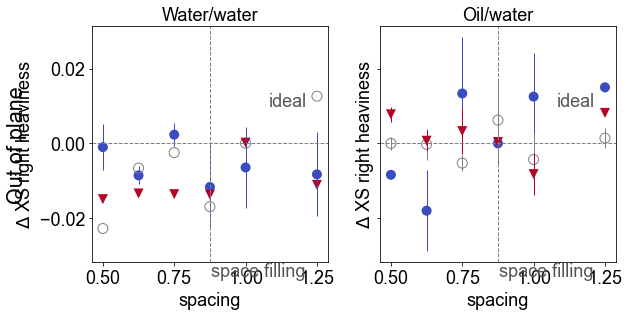

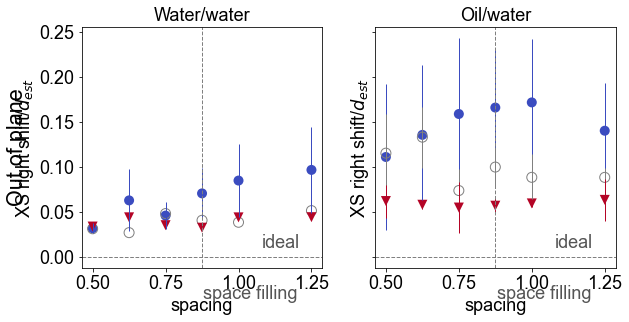

In [25]:
for ms in [msy, msz]:
    for s in ['delta_aspect', 'delta_h_n', 'delta_w_n', 'delta_yshift', 'delta_xshift', 'delta_xc_n']:
        waterOilPlots(ms, s, 0)

In [142]:
inspect =ms.ss[ms.ss.bot_w_dxprint>0.1]
inspect

,printFolder,bn,date,sigma,fluFile,calibFile,spacing,vRatio,dEst,viscRatio,...,top_w_dxprint,top_w_dxprint_SE,top_d_dxprint,top_d_dxprint_SE,top_d_dxf,top_d_dxf_SE,top_d_space_at,top_d_space_at_SE,top_d_space_a,top_d_space_a_SE
5,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_2.25_220928,220928.0,0.0,True,True,1.25,1.0,0.6,15.21,...,NaN,0.00,-0.61,0.0,-0.77,0.00,0.00,0.00,0.00,0.00
19,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_3.00_S_2.50_220928,220928.0,0.0,True,True,0.62,1.0,0.6,2.02,...,0.27,0.03,0.40,0.5,0.68,0.47,-2.79,0.54,-2.96,0.45


In [146]:
folder = inspect.iloc[1]['printFolder']
fh.openExplorer(folder)

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928\disturbVert_1.250\disturbVert_1.250_vertMeasure_I_3.00_S_2.25_220928_172117_0.csv


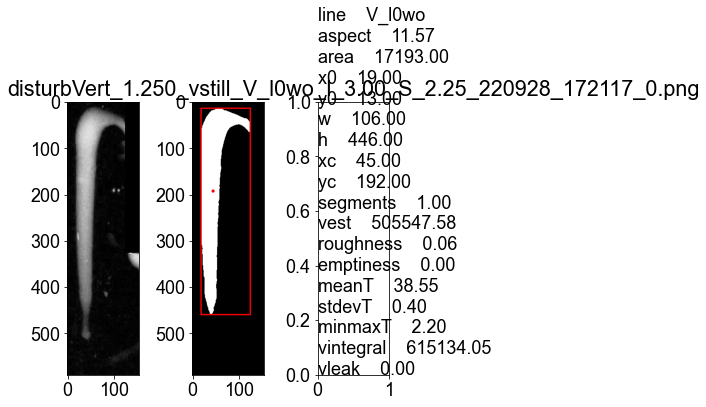

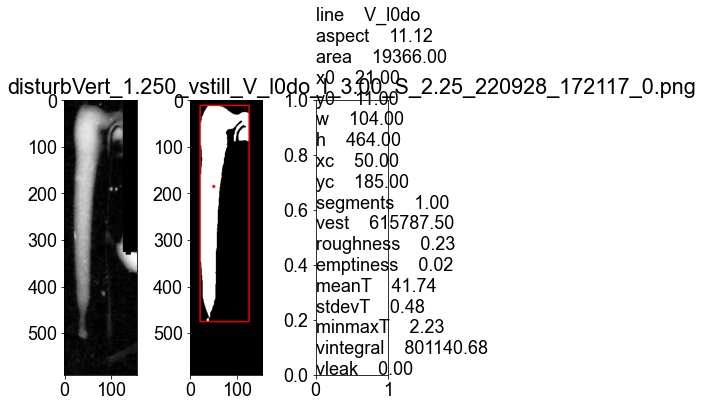

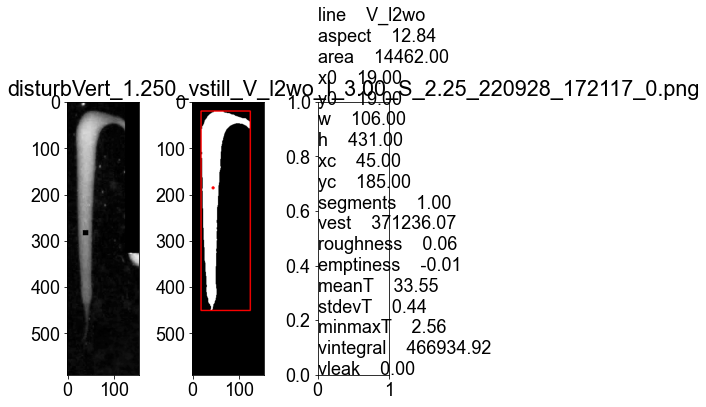

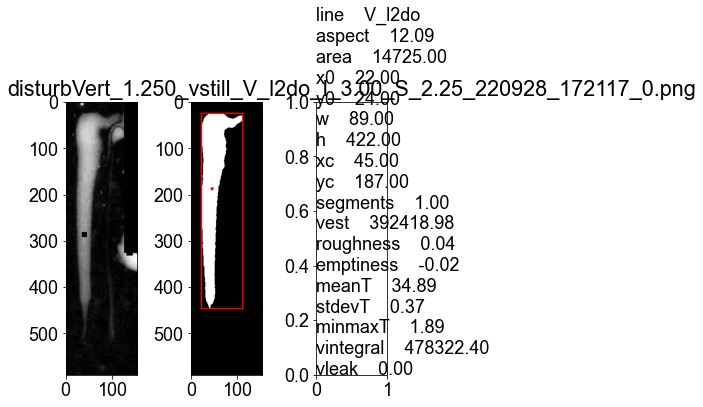

In [144]:
me.vertDisturbMeasures(folder, overwrite=True, diag=1, lines=['l0wo', 'l0do', 'l2wo', 'l2do'])

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.50\I_3.00_S_2.50_220928\disturbVert_0.625\disturbVert_0.625_vertMeasure_I_3.00_S_2.50_220928_161032_0.csv


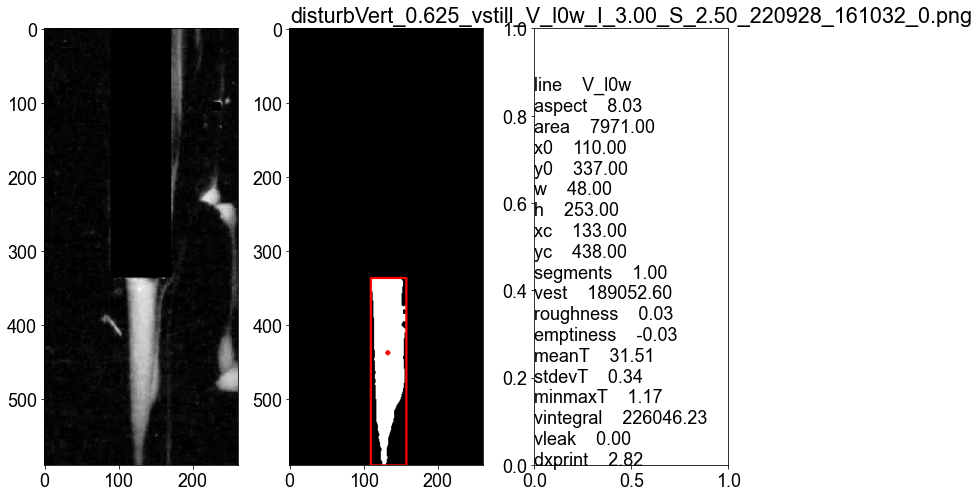

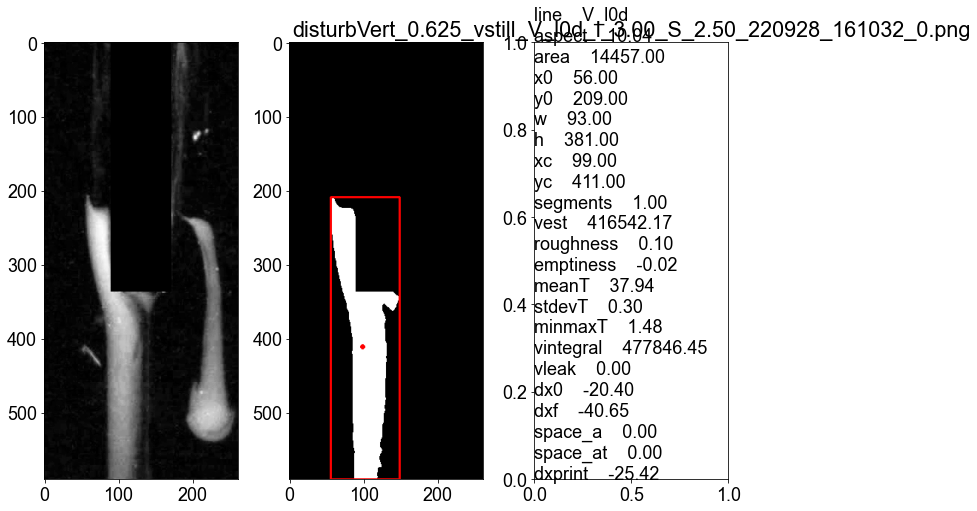

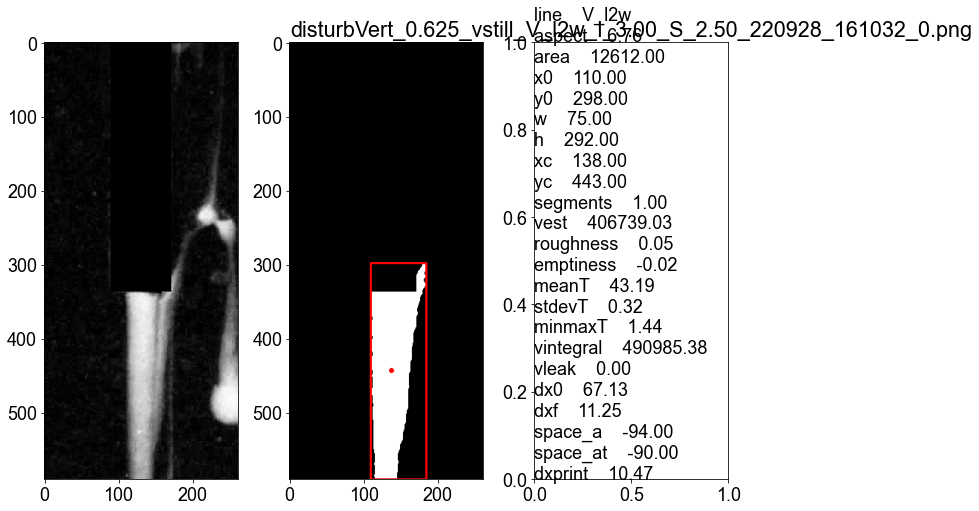

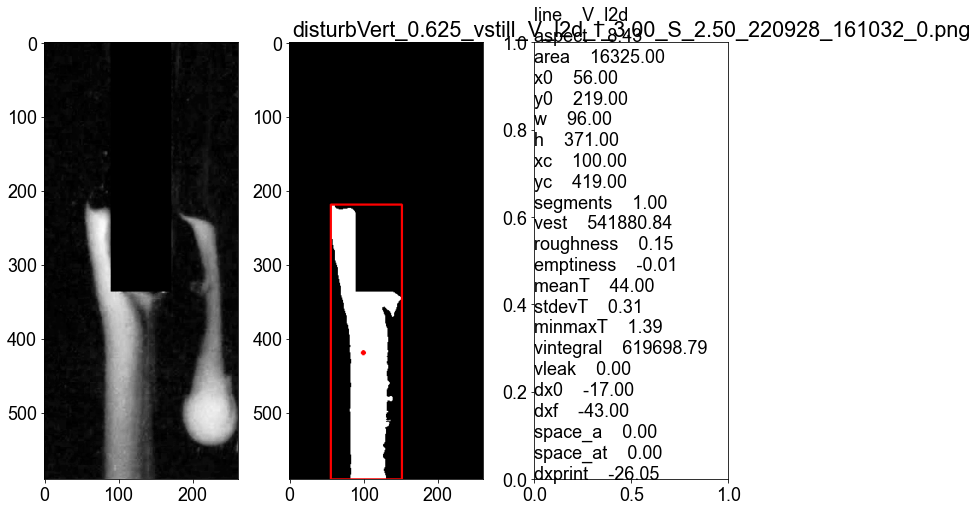

In [147]:
me.vertDisturbMeasures(folder, overwrite=True, diag=1, lines=['l0w', 'l0d', 'l2w', 'l2d'])

INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928_v2\disturbVert_1.250\disturbVert_1.250_vertMeasure_I_3.00_S_2.25_220928_153644_8.csv
INFO: Exported //cfs2e.nist.gov/642/internal/3D Printing Lab/Shopbot/videos/singleDisturb\LapRD_LapRD_visc\I_3.00_S_2.25\I_3.00_S_2.25_220928_v2\disturbVert_1.250\disturbVert_1.250_vertSummary_I_3.00_S_2.25_220928_153644_8.csv


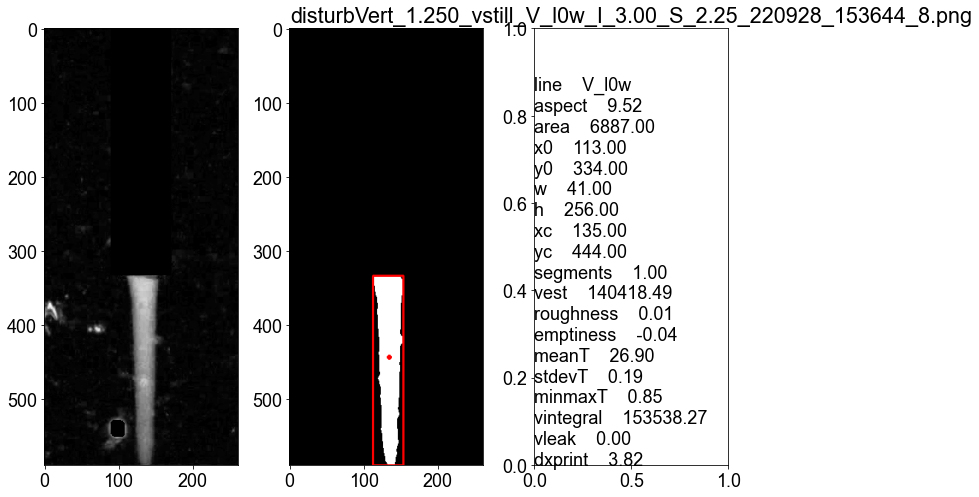

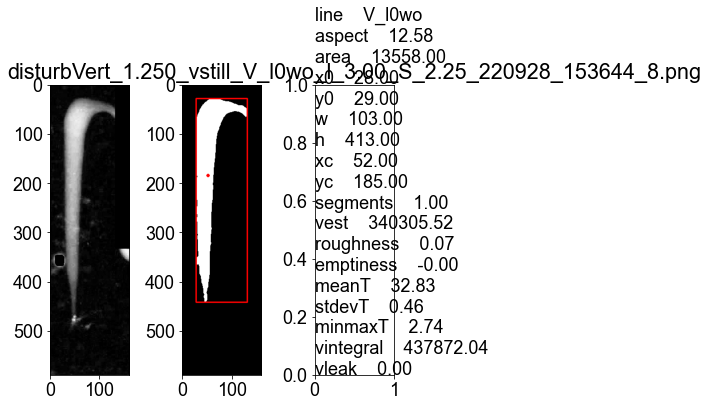

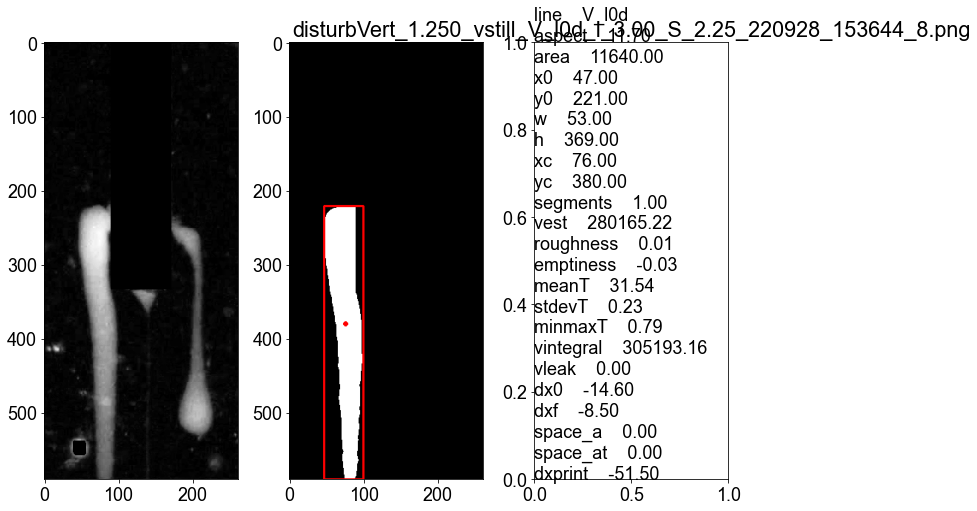

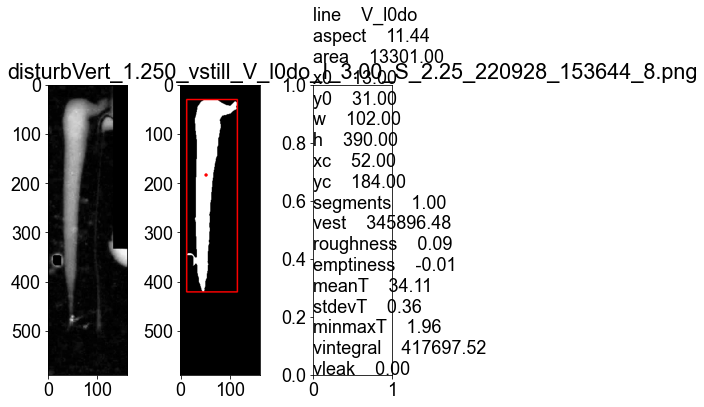

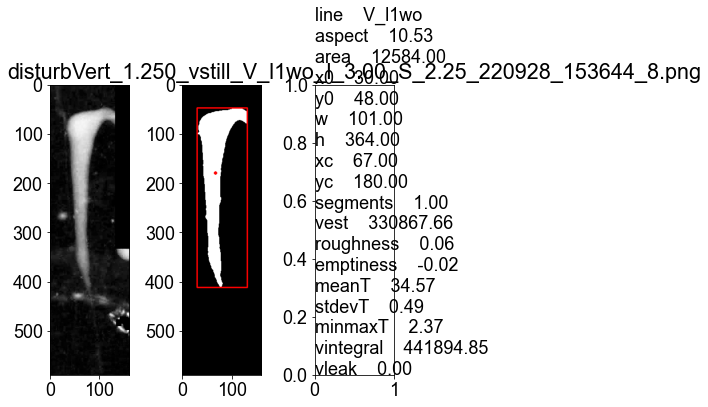

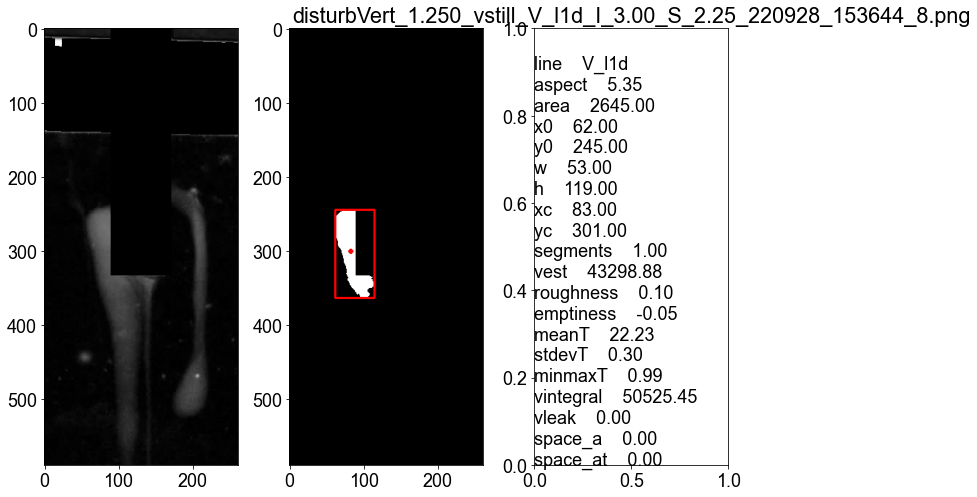

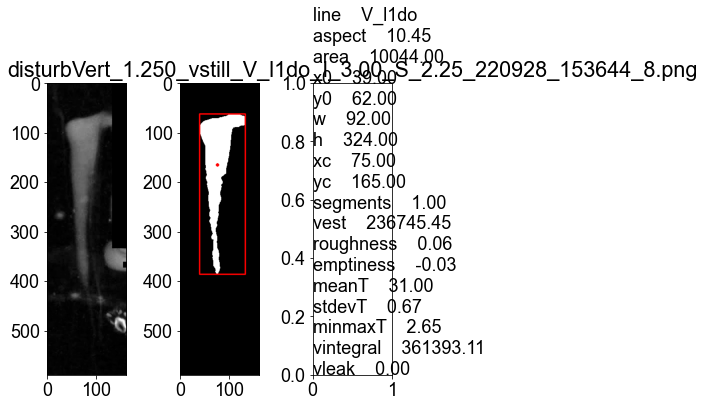

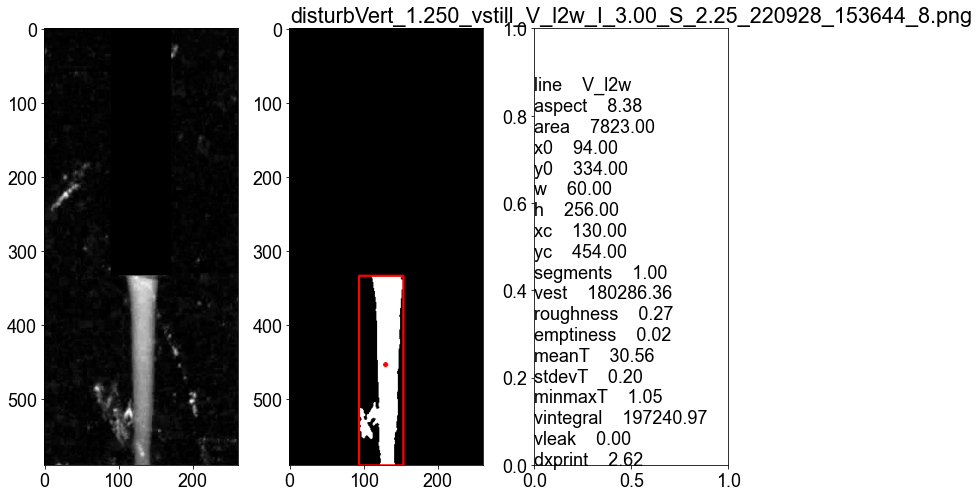

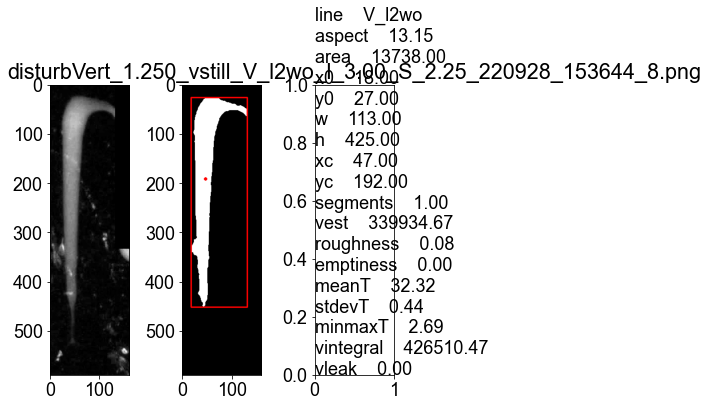

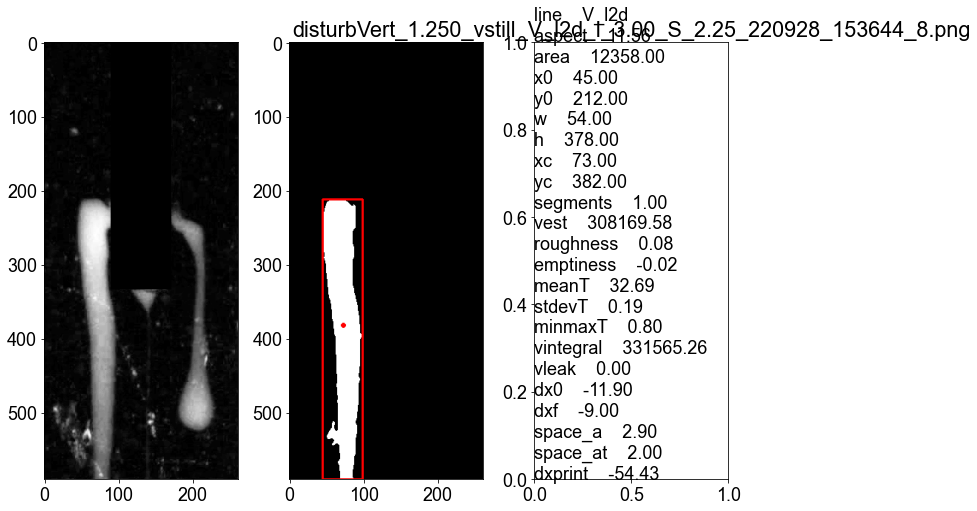

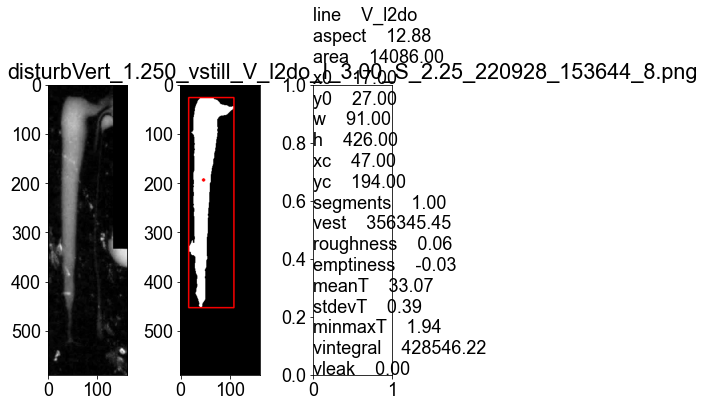

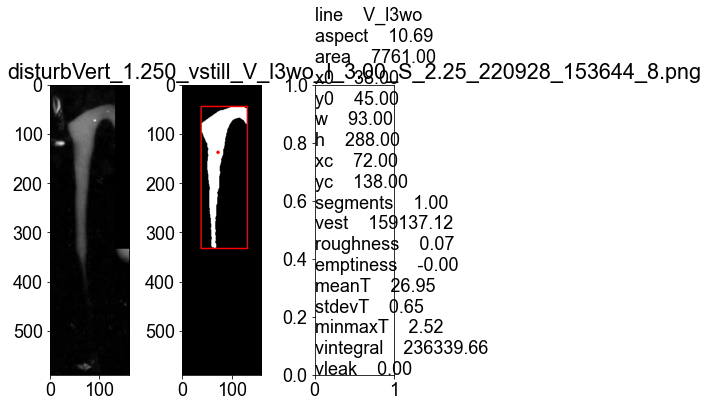

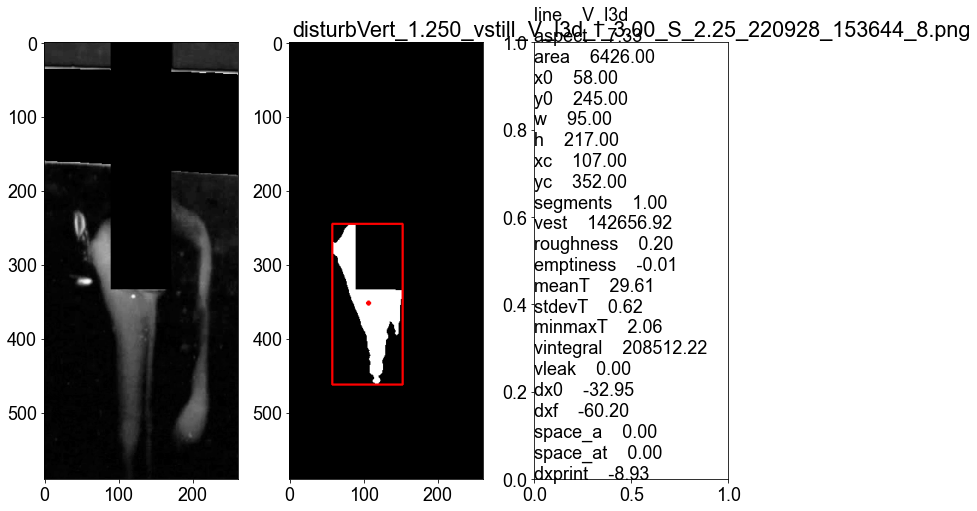

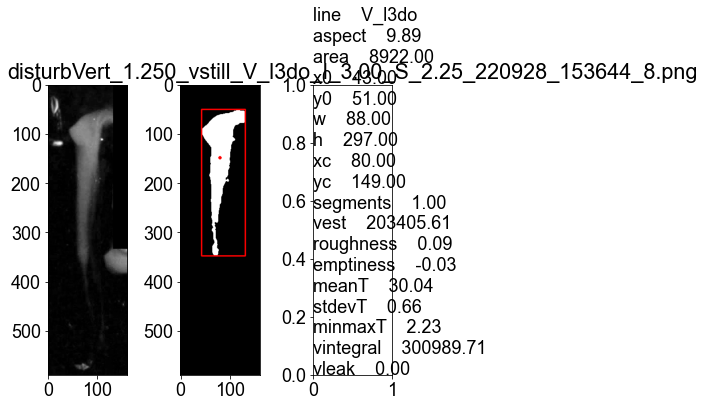

In [133]:
me.vertDisturbMeasures(folder, overwrite=True, diag=1)
me.vertDisturbSummary(folder, overwrite=True);